In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor  # Import Random Forest Regressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_log_error
import warnings

warnings.filterwarnings('ignore')

# Đọc dữ liệu từ tập tin CSV với các tùy chọn
# df = pd.read_csv('VCB Historical Data.csv', header=0, parse_dates=[0], index_col=0)
# df = pd.read_csv('ACB Historical Data.csv', header=0, parse_dates=[0], index_col=0)
df = pd.read_csv('MBB Historical Data.csv', header=0, parse_dates=[0], index_col=0)
df = df.dropna()  # Drop missing values

# In ra 5 dòng đầu tiên của DataFrame
print(df.head())
df = df.dropna()  # Drop missing values
df = df.reset_index(drop=True)  # Reset the index


              Price       Open     High        Low   Vol. Change %
Date                                                              
2023-12-22  18300.0  18,150.00  18450.0  18,100.00  8.55M    0.83%
2023-12-21  18150.0  18,100.00  18150.0  18,000.00  3.98M    0.00%
2023-12-20  18150.0  18,150.00  18200.0  18,050.00  3.09M    0.00%
2023-12-19  18150.0  18,000.00  18200.0  17,950.00  5.90M    0.83%
2023-12-18  18000.0  18,050.00  18150.0  17,950.00  5.28M   -0.28%


In [148]:
# # 2. chia train test validate theo tỉ lệ 9:1
# # Split the data into training, testing
# train_size = int(0.9 * len(df))
# test_size = int(0.1 * len(df))

# X2D = df[['High']]  # Biến độc lập theo mảng 2 chiều
# Y2D = df[['Price']]  # Biến phụ thuộc theo mảng 2 chiều

In [149]:
# # 2. chia train test validate theo tỉ lệ 9:1
# # Split the data into training, testing
# train_size = int(0.8 * len(df))
# test_size = int(0.2 * len(df))

# X2D = df[['High']]  # Biến độc lập theo mảng 2 chiều
# Y2D = df[['Price']]  # Biến phụ thuộc theo mảng 2 chiều

In [150]:

# 2. chia train test validate theo tỉ lệ 9:1
# Split the data into training, testing
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))

X2D = df[['High']]  # Biến độc lập theo mảng 2 chiều
Y2D = df[['Price']]  # Biến phụ thuộc theo mảng 2 chiều

In [151]:
y_train = Y2D[:train_size]
x_train = X2D[:train_size]
y_test = Y2D[train_size:]
x_test = X2D[train_size:]
y_train_index = y_train.index  # lấy ra index trước khi đổi nó về mảng 2 chiều ( phục vụ plot )
y_train = Y2D[:train_size].values.ravel()

# Tạo mô hình Random Forest
model = RandomForestRegressor()
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Ví dụ các giá trị cho số cây trong rừng
    'max_depth': [None, 10, 20, 30],  # Ví dụ các giá trị cho độ sâu tối đa của mỗi cây
    'min_samples_split': [2, 5, 10],  # Ví dụ các giá trị cho số lượng mẫu tối thiểu để chia một nút
    'min_samples_leaf': [1, 2, 4]  # Ví dụ các giá trị cho số lượng mẫu tối thiểu ở lá
}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Huấn luyện mô hình sử dụng grid search
rf_model = grid_search.fit(x_train, y_train)

# In ra kết quả tốt nhất
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}
Best score: 2869030.237060963


In [152]:
# dự đoán test
y_pred = rf_model.predict(x_test)
y_pred

array([ 9172.81005556,  9256.25911111,  9244.15611111,  9462.668     ,
        9241.62911111,  9462.668     ,  9256.25911111,  9175.23888889,
        9256.25911111,  9256.25911111,  9462.668     ,  9241.62911111,
       10067.66517857, 10067.66517857,  9549.74877778,  9628.538     ,
        9487.49466667,  9628.538     ,  9599.15766667,  9628.538     ,
        9487.49466667,  9172.81005556,  9256.25911111,  9462.668     ,
        9241.62911111,  9244.15611111,  9241.62911111,  9241.62911111,
        9175.23888889,  9256.25911111,  8857.6525    ,  9244.15611111,
        9241.62911111,  9241.62911111,  9101.47319048,  8918.57514286,
        8918.57514286,  8669.62966667,  8367.14819048,  8367.14819048,
        8367.14819048,  8418.19485714,  8367.14819048,  8550.62109524,
        8418.19485714,  8684.24966667,  8418.19485714,  8684.24966667,
        9049.48233333,  9049.48233333,  8708.793     ,  8708.793     ,
        8367.14819048,  8367.14819048,  8367.14819048,  8418.19485714,
      

In [153]:
last_row = df.tail(1)
last_data = last_row['Price'].values.reshape(-1, 1)
last_data

array([[9804.]])

In [154]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_days = []
# predict giá Close 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    x_pred_next = rf_model.predict(last_data)
    x_next_30_days.append(x_pred_next)
    last_data = x_pred_next.reshape(-1, 1)
x_next_30_days

[array([9655.936]),
 array([9548.93630159]),
 array([9487.49466667]),
 array([9462.668]),
 array([9462.668]),
 array([9462.668]),
 array([9462.668]),
 array([9462.668]),
 array([9462.668]),
 array([9462.668]),
 array([9462.668]),
 array([9462.668]),
 array([9462.668]),
 array([9462.668]),
 array([9462.668]),
 array([9462.668]),
 array([9462.668]),
 array([9462.668]),
 array([9462.668]),
 array([9462.668]),
 array([9462.668]),
 array([9462.668]),
 array([9462.668]),
 array([9462.668]),
 array([9462.668]),
 array([9462.668]),
 array([9462.668]),
 array([9462.668]),
 array([9462.668]),
 array([9462.668])]

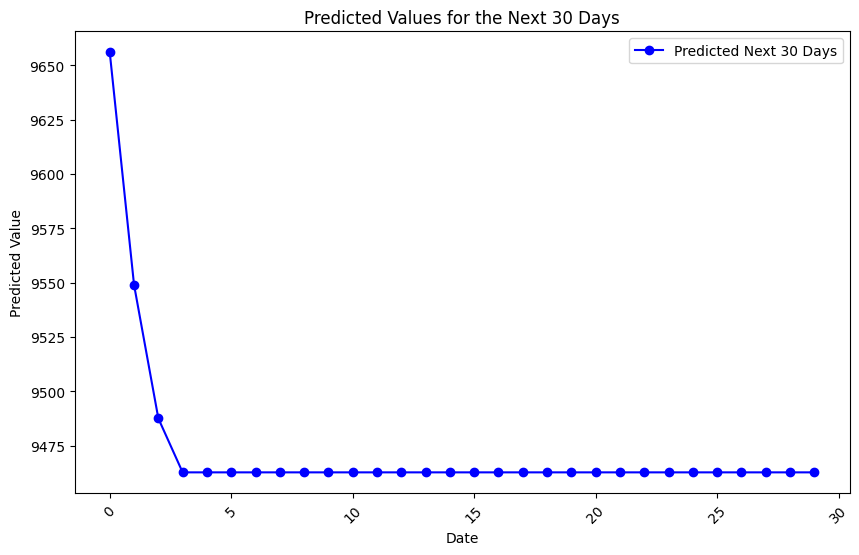

In [155]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(x_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [156]:
# Chuyển cột predict price thành mảng 2 chiều
y_pred = y_pred.reshape(-1, 1)

In [157]:
# 7. Đánh giá độ chính xác test bằng RMSE, MAE , MAPE

from sklearn.metrics import mean_absolute_error

# Tính toán MAE (Mean Absolute Error)
test_mae = mean_absolute_error(y_test, y_pred)
print('Testing MAE:', test_mae)

# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Testing MAPE:', test_mape)



Testing MAE: 102.77070198941806
Testing RMSE: 166.17908819897298
Testing MAPE: 0.010416061962857291


In [158]:
# Tạo index cho 30 ngày tiếp theo
last_index = df.index[-1]
next_30_dates = pd.RangeIndex(start=last_index, stop=last_index + 30, step=1)

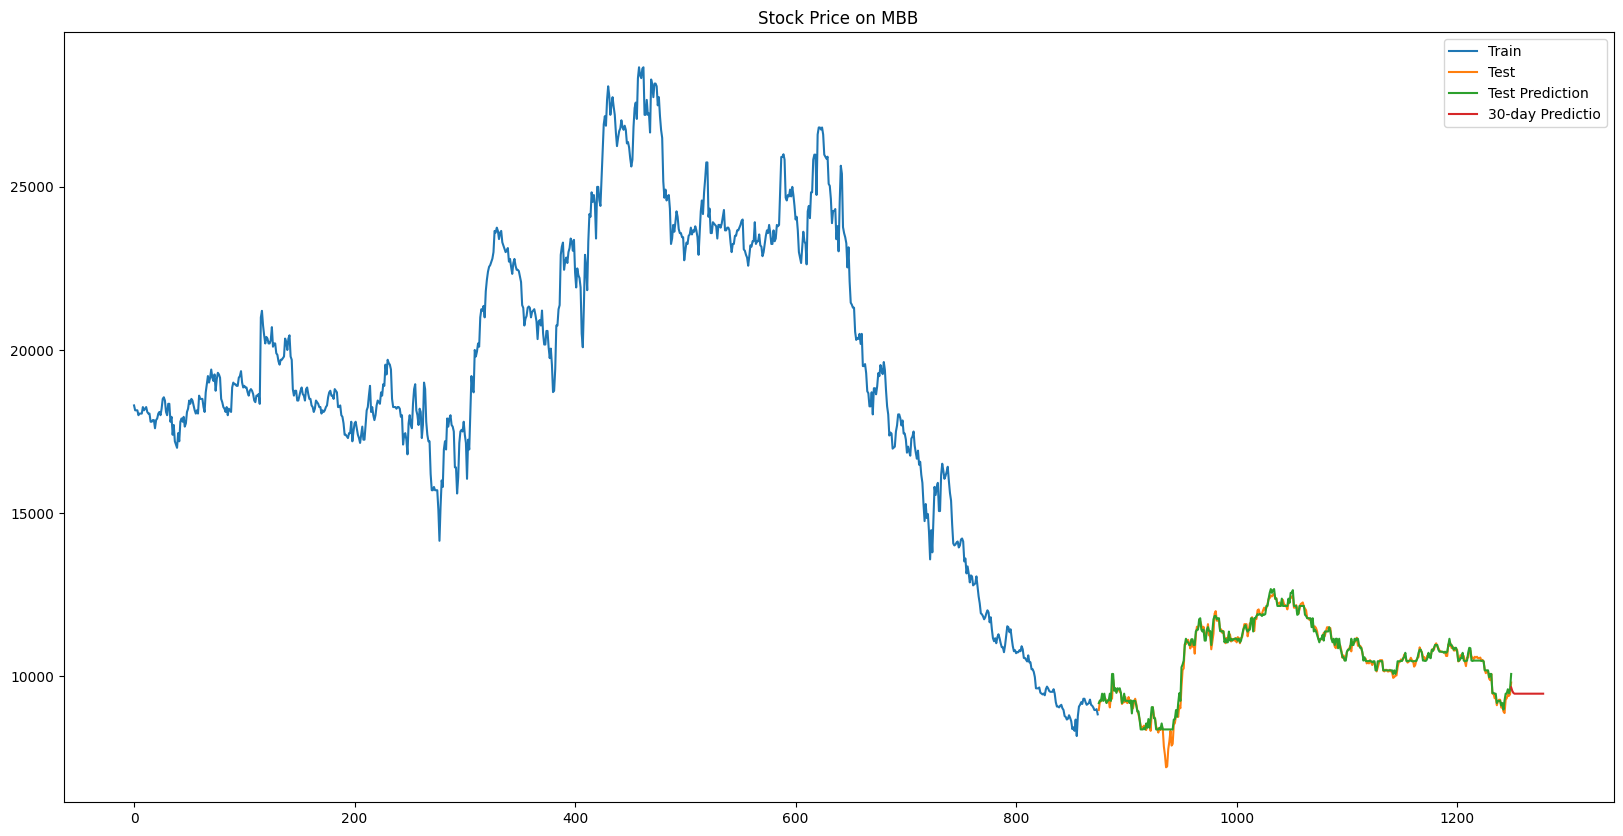

In [159]:
# 9.Vẽ hình
plt.figure(figsize=(20,10))
plt.plot(y_train_index, y_train)
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)
plt.plot(next_30_dates, x_next_30_days)
plt.legend(['Train', 'Test', 'Test Prediction', '30-day Predictio'])
plt.title('Stock Price on MBB')
plt.show()